In [5]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/El Chombo, Dancing Green Alien - Dame Tu Cosita feat. Cutty Ranks (Official Video) [Ultra Records].csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 21145
                    user_id                        username  \
0  UCSnDqnHH_BF5LR7BgaHLGLw                 @monicaruiz5531   
1  UCbPEjYkUYFTRkcpdQHWGDlA                    @GRIBSEXXX69   
2  UCri9d_8pPQ8RwoSF8YFKRgw  @sandrieleconceicaodasilvas459   
3  UCpIjd0QKKmaRnDqbEBHVAQw                    @SooHyun-w4o   
4  UCOqFrJr43TLSiL5i6qUL9Gw                   @ninaadam8844   

                                             comment  likes  replies  \
0  Hace unos dias capte de que trata la canción y...      0        0   
1                                      October 2024?      0        0   
2                                          💚♦️🤑💋👏♥️👏      0        0   
3                           Anyone in October 2024??      0        0   
4     Me in 2018 🕺💃\nMe in 2024 seeing the lyrics 🫢💀      0        0   

                   date                                              video  \
0  2024-10-20T17:02:26Z  El Chombo, Dancing Green 

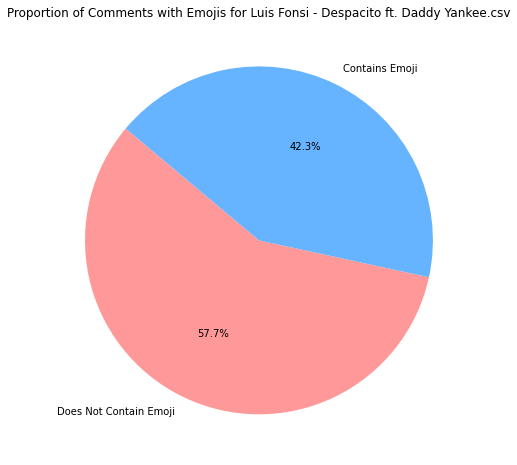

In [6]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [7]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-7-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
2,UCri9d_8pPQ8RwoSF8YFKRgw,@sandrieleconceicaodasilvas459,💚♦️🤑💋👏♥️👏,0,0,2024-10-20T16:44:34Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,2
4,UCOqFrJr43TLSiL5i6qUL9Gw,@ninaadam8844,Me in 2018 🕺💃\nMe in 2024 seeing the lyrics 🫢💀,0,0,2024-10-20T16:24:58Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,2
6,UCTzkyNRX6nJ_FcnI7QF3Z-w,@KateřinaHolková,💌,0,0,2024-10-20T16:07:33Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1
7,UCbJ4KdhhMg2Zyhl0z-R1Glw,@AshokSharma-u6x,Hello alien👽,0,0,2024-10-20T16:07:26Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1
12,UCVJ_b3arSo2bTzIGXd9MRyA,@azrarizan7841,😅😅😅😂🎉😊,0,0,2024-10-20T15:46:42Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1
...,...,...,...,...,...,...,...,...,...
49978,UCdc-v_xi9FBAaTrZ9DrSVpg,@lizzy_short,💀🤣,0,0,2023-02-11T20:09:16Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1
49981,UC79kVTN0FgMWkVtkRlY9-1g,@oscarcardenas6052,💗💗💖😮🥴🥴🥺,0,0,2023-02-11T19:10:41Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1
49986,UCfKjNELMwHdF0y13MxIXvUA,@trollgety6555,£§Μ¬Г°¥₹៛₪ฯ﷼Θ﷼Ω฿Θ﷼,0,0,2023-02-11T18:07:15Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,3
49991,UC4lHv_qHd2meIiGKN6jh-cw,@andreacarolinacolmenareshe8194,la canción dice yisus te mato y avisas o te mo...,0,0,2023-02-11T16:35:04Z,"El Chombo, Dancing Green Alien - Dame Tu Cosit...",True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'El Chombo, Dancing Green Alien - Dame Tu Cosita feat. Cutty Ranks (Official Video) [Ultra Records].csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 1: Detected language: es
Row 1: Original: Hace unos dias capte de que trata la canción y mi hermana de 1 año la pasa bailando💀la pudrición cerebral total, Translated: A few days ago I heard what the song is about and my 1-year-old sister spends all her time dancing to it, totally brain rotting 💀
Row 1 saved.
Row 3: Error translating text: 💚♦️🤑💋👏♥️👏, Error: No features in text.
Row 3 saved.
Row 5: Detected language: en
Row 5: Original: Me in 2018 🕺💃
Me in 2024 seeing the lyrics 🫢💀, Translated: Me in 2018 
Me in 2024 seeing the lyrics 🫢 🕺💃💀
Row 5 saved.
Row 6: Text contains only emojis or is empty: 💌💌💌💌💌💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💌💌💌💌💌

💌💌💌💌💌💌
💌💜💜💜💜💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💌💌💌💌

💌💌💌💌💌💌
💌💜💜💜💜💌
💌💜💌💌💌💌
💌💜💜💜💜💌
💌💌💌💌💜💌
💌💜💜💜💜💌
💌💌💌💌💌💌
💌💌💌💌💌💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💌💌💌💌💌

💌💌💌💌💌💌
💌💜💜💜💜💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💌💌💌💌

💌💌💌💌💌💌
💌💜💜💜💜💌
💌💜💌💌💌💌
💌💜💜💜💜💌
💌💌💌💌💜💌
💌💜💜💜💜💌
💌💌💌💌💌💌
💌💌💌💌💌💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💜💌💌💜💌
💌💜💜💜💌💌
💌💌💌💌💌💌

💌💌💌💌💌💌
💌💜💜💜💜💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌💜💜💌💌
💌💌

Row 100: Original: Dbgxnk vídeo 😢, Translated: Dbgxnk video 😢
Row 100 saved.
Row 101: Error translating text: 2018💃🏽
2024💀💀💀💀, Error: No features in text.
Row 101 saved.
Row 104: Text contains only emojis or is empty: 😢❤🎉
Row 104 saved.
Row 107: Text contains only emojis or is empty: ❤❤😂
Row 107 saved.
Row 108: Detected language: lv
Row 108: Original: 2018: ufo😠
2024:ja…not bad, Translated: 2018: ufo
2024:ja…not bad 😠
Row 108 saved.
Row 109: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 109 saved.
Row 110: Detected language: de
Row 110: Original: 😅 0:31 🤬BRO, Translated: 0:31 🤬BRO 😅
Row 110 saved.
Row 111: Detected language: en
Row 111: Original: Bro this is my childhood😢, Translated: Bro this is my childhood 😢
Row 111 saved.
Row 113: Text contains only emojis or is empty: 😂😂😂😂😂😂❤
Row 113 saved.
Row 114: Detected language: cy
Row 114: Original: Mdr😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂, Translated: Mdr 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
Row 114 saved.
Row 1

Row 247: Original: সেই😂😂😂, Translated: That 😂😂😂
Row 247 saved.
Row 248: Detected language: en
Row 248: Original: Americans😀


Hispanics💀, Translated: Americans


Hispanics 😀💀
Row 248 saved.
Row 250: Error translating text: 2024😂❤, Error: No features in text.
Row 250 saved.
Row 254: Text contains only emojis or is empty: ❤❤❤❤❤😂😂😂😂😂😂😂
Row 254 saved.
Row 258: Detected language: da
Row 258: Original: Kid: 😃
Big:💀, Translated: Kid: 
Big: 😃💀
Row 258 saved.
Row 259: Detected language: tl
Row 259: Original: 😂😂😮😂😂😅😂😂 no, Translated: no 😂😂😮😂😂😅😂😂
Row 259 saved.
Row 260: Detected language: tl
Row 260: Original: 😂😂😮😂😂😅😂😂 no, Translated: no 😂😂😮😂😂😅😂😂
Row 260 saved.
Row 261: Text contains only emojis or is empty: ❤❤❤
Row 261 saved.
Row 262: Text contains only emojis or is empty: 😅😅😅😅😅😅😅😅
Row 262 saved.
Row 266: Detected language: ar
Row 266: Original: شكلي بس اني العربي الوحيد هنا 😂😂😅😢, Translated: I think I'm the only Arab here 😂😂😅😢
Row 266 saved.
Row 267: Detected language: pl
Row 267: Original: wow

Row 365: Original: Cadê a tropa de 2024 em 😂❤, Translated: Where are the 2024 troops? 😂❤
Row 365 saved.
Row 366: Text contains only emojis or is empty: ❤❤❤❤🎉🎉🎉
Row 366 saved.
Row 368: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 368 saved.
Row 370: Text contains only emojis or is empty: 😡😡😡
Row 370 saved.
Row 371: Text contains only emojis or is empty: ❤
Row 371 saved.
Row 372: Error translating text: 2024 😮😮😂, Error: No features in text.
Row 372 saved.
Row 373: Text contains only emojis or is empty: 언제나 항상 건행하세요
Row 373 saved.
Row 374: Detected language: tl
Row 374: Original: Bhaiya tomato ko😂, Translated: tomato ko brother 😂
Row 374 saved.
Row 375: Detected language: en
Row 375: Original: I remember vibing to this song as a kid💀☠️, Translated: I remember vibing to this song as a kid 💀☠️
Row 375 saved.
Row 379: Text contains only emojis or is empty: 😅
Row 379 saved.
Row 380: Detected language: en
Row 380: Original: 4 billion views on a video where u cnat even understand the lyri

Row 482: Original: Sj. Isks lqlllq , pslwqqls 😂😂😂 sllwlw.   Lsllsdk2??, Translated: Sj. Isks lqlllq , pslwqqls sllwlw. Lsllsdk2?? 😂😂😂
Row 482 saved.
Row 485: Text contains only emojis or is empty: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
Row 485 saved.
Row 486: Detected language: en
Row 486: Original: Lmaoo my 5 year old likes this song, it’s all his dad’s fault!😂, Translated: Lmaoo my 5 year old likes this song, it’s all his dad’s fault! 😂
Row 486 saved.
Row 488: Detected language: en
Row 488: Original: This moroon is moaning like he was clapping in his bedroom plus the uhHHhhHHh was so personal 💀💀💀💀💀, Translated: This moroon is moaning like he was clapping in his bedroom plus the uhHHhhHHh was so personal 💀💀💀💀💀
Row 488 saved.
Row 490: Detected language: en
Row 490: Original: English People 😇
Spanish People 😈
Bulgaria People 👈😐👉, Translated: English People 
Spanish People 
Bulgaria People 😇😈👈😐👉
Row 490 saved.
Row 493: Detected language: vi
Row 493: Original:

Row 602: Original: هههههه😂, Translated: Hahahahahaha 😂
Row 602 saved.
Row 603: Text contains only emojis or is empty: 😂😂😂😂😂😂
Row 603 saved.
Row 604: Detected language: en
Row 604: Original: I have not hear this in a while now I'm back watching this❤, Translated: I have not hear this in a while now I'm back watching this ❤
Row 604 saved.
Row 609: Detected language: vi
Row 609: Original: 1:18 Ahhh~ 😩, Translated: 1:18 Ahhh~ 😩
Row 609 saved.
Row 613: Detected language: sv
Row 613: Original: Fvs, 💋😊, Translated: Fvs, 💋😊
Row 613 saved.
Row 615: Text contains only emojis or is empty: ❤❤❤
😊😊😊😊😊😊😊
Row 615 saved.
Row 618: Detected language: en
Row 618: Original: This is so stupid🙄😅🤣, Translated: This is so stupid🤣 🙄😅
Row 618 saved.
Row 620: Detected language: en
Row 620: Original: 0:26 what was that😂😂, Translated: 0:26 what was that 😂😂
Row 620 saved.
Row 622: Detected language: so
Row 622: Original: 😂😂😂o😂ooo, Translated: oooo 😂😂😂😂
Row 622 saved.
Row 624: Error translating text: 😂😂😂😂🥳🥳🥳🥳🥳🥳🥳👸👸👸, 

Row 728: Original: En 2018 quand on dansait dessus devant nous parents avec le son de na meuf qui jouie et eux avec la traduction en bas de l’écran pendant que nous on comprenait pas les paroles 😂, Translated: In 2018 when we danced to it in front of our parents with the sound of a girl enjoying herself and them with the translation at the bottom of the screen while we didn't understand the lyrics 😂
Row 728 saved.
Row 729: Text contains only emojis or is empty: 😅
Row 729 saved.
Row 731: Text contains only emojis or is empty: 😢😂😂😂
Row 731 saved.
Row 732: Detected language: hr
Row 732: Original: Xbzosgzm😊❤❤😊nog😅😅, Translated: Xbzosgzmnog 😊❤❤😊😅😅
Row 732 saved.
Row 733: Text contains only emojis or is empty: ❤😂😂🎉😢😢😮😊
Row 733 saved.
Row 734: Detected language: pt
Row 734: Original: Brasileiros em 2024
👇🇧🇷, Translated: Brazilians in 2024 👇🇧🇷
Row 734 saved.
Row 735: Detected language: ur
Row 735: Original: ت😊, Translated: T 😊
Row 735 saved.
Row 738: Detected language: en
Row 738: Original: 4B

Row 858: Original: Me dejaron sola en casa con mi amiga y lo hice    aganlo❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉🎉🎉😂❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤, Translated: They left me alone at home with my friend and I did it. ❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉🎉🎉😂❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 858 saved.
Row 861: Detected language: ar
Row 861: Original: ،🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🙂🙂🙂🙂🙂🙂👎👎👎👎👎👎👎👎🤦🤦🤦🤦🤦🦥🦥🦥🦘🦘🦘, Translated: None 🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🇩🇿🙂🙂🙂🙂🙂🙂👎👎👎👎👎👎👎👎
Row 861 saved.
Row 862: Detected language: en
Row 862: Original: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂o😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂, Translated: o 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
Row 862 saved.
Row 863: Text contains only emojis or is empty: 😂😂😂😂😂
Row 863 saved.
Row 867: Detected language: pl
Row 867: Original: Ciao iiriidiiiiziejjzj😢😢😢😢🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊❤❤❤❤❤❤❤❤❤❤😊, Translated: Ciao iiriidiiiiziejjjj 😢😢😢😢🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊❤❤❤❤❤❤❤❤❤❤😊
Row 867 saved.
Row 868: Detected language: ar
Row 868: Original: ❤❤❤خع

Row 967: Original: 😢nah, Translated: nah 😢
Row 967 saved.
Row 970: Detected language: en
Row 970: Original: This Was Personal 0:12 💀, Translated: This Was Personal 0:12 💀
Row 970 saved.
Row 973: Detected language: ru
Row 973: Original: Яжһһрньлд


М




,.и 😂🈂️, Translated: I am

M

,.i 😂🈂️
Row 973 saved.
Row 975: Text contains only emojis or is empty: 😂😂😂😂😂😂😂😅😅😅😢😢😢😢😢😢
Row 975 saved.
Row 977: Detected language: es
Row 977: Original: Me as a 8y/o :😀
Me as a 16y/o : 💀, Translated: Me as a 8y/o :
Me as a 16y/o : 😀💀
Row 977 saved.
Row 979: Detected language: hi
Row 979: Original: यार भारतीय लोग सभी कृपया हिंदी में बात करो वैसे भी अंग्रेज गुलगल ट्रांसलेट कर लेंगे 😢, Translated: Hey Indian people please talk in Hindi, anyway the British will translate it in gulgar 😢
Row 979 saved.
Row 980: Text contains only emojis or is empty: 😂😂😂
Row 980 saved.
Row 982: Text contains only emojis or is empty: 😡
Row 982 saved.
Row 983: Text contains only emojis or is empty: 😊
Row 983 saved.
Row 988: Detected

Row 1087: Original: Kkkkkk😂😂😂😂😂, Translated: Hahaha 😂😂😂😂😂
Row 1087 saved.
Row 1089: Detected language: en
Row 1089: Original: My mother forbade me to watch it when I was 6-7 years old😂😂😂, Translated: My mother forbade me to watch it when I was 6-7 years old 😂😂😂
Row 1089 saved.
Row 1091: Text contains only emojis or is empty: 😂
Row 1091 saved.
Row 1093: Detected language: en
Row 1093: Original: This is so funny😂😊, Translated: This is so funny 😂😊
Row 1093 saved.
Row 1098: Error translating text: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 1:29 😂😂😂😂😂😂😂😂😂 1:33 😂 1:33 😂 1:34 😂 1:34 😂 1:34 😂😂😂😂😂😂😂😂😂😂😂😂😂😂 1:38 😂 1:39 😂😂😂😂😂😂😂😂😂 1:41 1:41 😂 1:41 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂❤🎉😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂, Error: No features in text.
Row 1098 saved.
Row 1099: Detected language: ru
Row 1099: Original: Ах😂, Translated: Brother 😂
Row 1099 saved.
Row 1100: Error translating text: 7,10,2024😂😂😂😂😂😂😂😂😂, Error: No features in text.
Row 1100 saved.
Row 1103: Detected language: en
Row 1103: Or

Row 1207: Original: I like it😮, Translated: I like it 😮
Row 1207 saved.
Row 1210: Text contains only emojis or is empty: 😂😂😂😂😂😂
Row 1210 saved.
Row 1214: Detected language: pl
Row 1214: Original: nice🎉nice😮😮😮😢😢😢😂😂😂🎉🎉🎉🎉🎉🎉, Translated: nicenice 🎉😮😮😮😢😢😢😂😂😂🎉🎉🎉🎉🎉🎉
Row 1214 saved.
Row 1218: Detected language: ca
Row 1218: Original: 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂l🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕(*^^*)(*^^*)(*^^*):->＼(^^)／;-):-, Translated: l(*^^*)(*^^*)(*^^*):->(^^);-):- 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕＼／
Row 1218 saved.
Row 1221: Detected language: en
Row 1221: Original: My auntie showed this to me as a littile kid😂 and I had so many questions, Translated: My auntie showed this to me as a littile kid and I had so many questions 😂
Row 1221 saved.
Row 1223: Detected language: en
Row 1223: Original: Bro look closely he has bruises on his body I think he’s forced😅😢, Translated: Bro look closely 

Row 1335: Original: Samajh mein nahin aaya lekin achaa lagaa😅😅😅😅, Translated: I did not understand it but it felt good 😅😅😅😅
Row 1335 saved.
Row 1336: Detected language: so
Row 1336: Original: Good😂😂😂😂😂, Translated: Good 😂😂😂😂😂
Row 1336 saved.
Row 1338: Detected language: af
Row 1338: Original: ❤i, Translated: i ❤
Row 1338 saved.
Row 1343: Detected language: en
Row 1343: Original: G thank😂😂😂😂😂😂😂k ❤😂😂😂, Translated: G thankk 😂😂😂😂😂😂😂❤😂😂😂
Row 1343 saved.
Row 1345: Detected language: es
Row 1345: Original: 😂😂😂😂😂😂😂😂😂 don't, Translated: don't 😂😂😂😂😂😂😂😂😂
Row 1345 saved.
Row 1349: Detected language: en
Row 1349: Original: What am I watching rn! 😂😂😂, Translated: What am I watching rn! 😂😂😂
Row 1349 saved.
Row 1351: Detected language: en
Row 1351: Original: Who knows the translation? 💀, Translated: Who knows the translation? 💀
Row 1351 saved.
Row 1352: Text contains only emojis or is empty: 😏
Row 1352 saved.
Row 1353: Detected language: en
Row 1353: Original: Our childhood😊😅, Translated: Our childhoo

Row 1440: Original: So nostalgic 😢, Translated: So nostalgic 😢
Row 1440 saved.
Row 1443: Text contains only emojis or is empty: 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
Row 1443 saved.
Row 1445: Detected language: ru
Row 1445: Original: Супер движение😂😂😂😂, Translated: Super move 😂😂😂😂
Row 1445 saved.
Row 1446: Detected language: et
Row 1446: Original: Nostalgia 😢😢😢😢, Translated: Nostalgia 😢😢😢😢
Row 1446 saved.
Row 1448: Text contains only emojis or is empty: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
😂😂😂😂😂😂😂😂
😂😂😂😂😂😂
😂😂😂😂😂
😂😂😂😂
😂😂😂
😂😂
😂
Row 1448 saved.
Row 1453: Detected language: sw
Row 1453: Original: Ha ha ha ha ha ha ha very very funny😂, Translated: Ha ha ha ha ha ha ha very very funny 😂
Row 1453 saved.
Row 1454: Detected language: fi
Row 1454: Original: Turkeyyyy❤❤❤😊❤, Translated: Turkeyyyy ❤❤❤😊❤
Row 1454 saved.
Row 1455: Detected language: en
Row 1455: Original: When you realize the lyrics of this song in middle school Spanish learning… 💀💀💀💀🪦🪦🪦, Translated: When you realize the lyrics of this song in middle school Spanish learning… 🪦🪦

Row 1537: Original: 😮😮😮😮😮😮😮😮😮😮😢😮😮😮😮😮😅😅😅😮 0:56 b*khi 0:56 0:56 😅😅😅😅, Translated: 0:56 b*khi 0:56 0:56 😮😮😮😮😮😮😮😮😮😮😢😮😮😮😮😮😅😅😅😮😅😅😅😅
Row 1537 saved.
Row 1539: Detected language: tr
Row 1539: Original: Chustiy manti norin tumani hokimi bilan ilohim dardlariga shifo tilayman senga bu sozlarni aytmas edim bu oy 😅 0:46, Translated: I wish you a speedy recovery from your illness, I would not have said these words to you this month 0:46 😅
Row 1539 saved.
Row 1540: Text contains only emojis or is empty: 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍
Row 1540 saved.
Row 1541: Text contains only emojis or is empty: 😮
Row 1541 saved.
Row 1544: Detected language: en
Row 1544: Original: 2020:this is so funny😂
2024:why was the girl that was tryna make the vid moan💀, Translated: 2020:this is so funny
2024:why was the girl that was tryna make the vid moan 😂💀
Row 1544 saved.
Row 1547: Text contains only emojis or is empty: 😐😐
Row 1547 saved.
Row 1548: Detected language: tl
Row 1548: Original: 2025 anyone?😂, Translated: 

Row 1672: Original: Muito lindoooo❤❤😂😂😂😂😂, Translated: Very beautiful ❤❤😂😂😂😂😂
Row 1672 saved.
Row 1673: Detected language: en
Row 1673: Original: Bro☠️☠️💀💀💀💀👅👅👅, Translated: Bro ☠️☠️💀💀💀💀👅👅👅
Row 1673 saved.
Row 1674: Detected language: ru
Row 1674: Original: Пашу на это сообщение 0:18 😅, Translated: Pashu on this message 0:18 😅
Row 1674 saved.
Row 1675: Detected language: ru
Row 1675: Original: Пашу на это сообщение 0:18 😅, Translated: Pashu on this message 0:18 😅
Row 1675 saved.
Row 1677: Detected language: fi
Row 1677: Original: Kkkkkkkkkkkkkk 😂😂😂😂😂😂😂😂😂😂😂😂😂, Translated: Kkkkkkkkkkkkk 😂😂😂😂😂😂😂😂😂😂😂😂😂
Row 1677 saved.
Row 1679: Detected language: en
Row 1679: Original: Bro me in 2018-2020 all the time❤, Translated: Bro me in 2018-2020 all the time ❤
Row 1679 saved.
Row 1681: Error translating text: 22:00😂😂, Error: No features in text.
Row 1681 saved.
Row 1682: Detected language: en
Row 1682: Original: When I was only 5 to 6 I liked this song very much 🙃
But now I understand 🗿💀, Translated:

Row 1804: Original: 😂😂مستحيل الصوت تع البنت, Translated: Impossible, the girl's voice 😂😂
Row 1804 saved.
Row 1805: Detected language: fa
Row 1805: Original: ههههههههههه ههههه ههههههههههههههههههه ههههههه هههه الغنيه عيب هههههههههههه 😂😂ترجمتها مو حلووووو 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🫣, Translated: Hahahahahaha hahahahaha the song is wrong hahahahaha its translation is not good 🤣🤣🤣🤣🫣 😂😂
Row 1805 saved.
Row 1807: Detected language: en
Row 1807: Original: My consequence of my childhood and now I am back to see the truth…. 😵, Translated: My consequence of my childhood and now I am back to see the truth…. 😵
Row 1807 saved.
Row 1809: Detected language: en
Row 1809: Original: Any one in 2024 /9/ 😅😂❤, Translated: Any one in 2024 /9/ 😅😂❤
Row 1809 saved.
Row 1810: Detected language: en
Row 1810: Original: Anyone here in September 2024❤, Translated: Anyone here in September 2024 ❤
Row 1810 saved.
Row 1812: Detected language: sw
Row 1812: Original: Ul❤, Translated: Ul ❤
Row 1812 saved.
Row 1814: Detected language

Row 1915: Original: Why did it say Hulu😅😅😅😅😅😅😅😅😅😅😅, Translated: Why did it say Hulu 😅😅😅😅😅😅😅😅😅😅😅
Row 1915 saved.
Row 1918: Detected language: en
Row 1918: Original: I'll never understand why this has almost 5 Billion Views 💀, Translated: I'll never understand why this has almost 5 Billion Views 💀
Row 1918 saved.
Row 1919: Detected language: en
Row 1919: Original: You  don't no what there saying it's inappropriate its spinish and when they say ah inappropriate  but so funny 😂, Translated: You  don't no what there saying it's inappropriate its spinish and when they say ah inappropriate  but so funny 😂
Row 1919 saved.
Row 1922: Detected language: en
Row 1922: Original: 0:22   the moan💀🙏, Translated: 0:22   the moan 💀🙏
Row 1922 saved.
Row 1923: Detected language: sl
Row 1923: Original: Dk j. Oj. Lx j. Lsnlxnbjx. O. Ñ fn id on od bldbi. Ondlld id. ❤❤ Dkx idnodnidn dj xmpzl. Xlznzoznzozkxoznz.❤❤❤, Translated: Dk j. Oj. Lx j. Lsnlxnbjx. O. Ñ fn id on od bldbi. Ondlld id. Dkx idnodnidn dj xmpzl

Row 2016: Original: 😂😂😂😂 kkkkkkkkk 🤣🤣😉🤣😅💩🎃🙈💤💤✨💩😻, Translated: kkkkkkkk 🤣🤣🤣 😂😂😂😂😉😅💩🎃🙈💤💤✨💩😻
Row 2016 saved.
Row 2017: Detected language: tr
Row 2017: Original: 𝘈𝘺 ö𝘭𝘥ü𝘮 𝘨ü𝘭𝘮𝘦𝘬𝘥𝘦𝘯, Translated: où ü 𝘈𝘺𝘭𝘥𝘮𝘨𝘭𝘮𝘦𝘬𝘥𝘦𝘯
Row 2017 saved.
Row 2024: Detected language: ar
Row 2024: Original: هلا هلا سكتنا بي جهالنه😂, Translated: Hello hello, we are silent in our ignorance 😂
Row 2024 saved.
Row 2025: Text contains only emojis or is empty: 😅😅😅🎉❤😅😅
Row 2025 saved.
Row 2028: Detected language: tl
Row 2028: Original: Ah😂, Translated: Ah 😂
Row 2028 saved.
Row 2030: Detected language: en
Row 2030: Original: 2015: I think what is this character  
2024: but not knowing the meaning😅😭😭😭, Translated: 2015: I think what is this character  
2024: but not knowing the meaning 😅😭😭😭
Row 2030 saved.
Row 2031: Error translating text: 😆😆🤙😆😆, Error: No features in text.
Row 2031 saved.
Row 2032: Detected language: en
Row 2032: Original: Srry i still don't know the lyric 😂, Translated: Srry i still don't know the lyric 😂
Ro

Row 2124: Original: ए😂वे7🎉🎉8838ए399⁴7⁴⁷8998⁸⁹पी0, Translated: ave78838a399⁴7⁴⁷8998⁸⁹p0 😂🎉🎉
Row 2124 saved.
Row 2125: Detected language: es
Row 2125: Original: Yo una ves se la enseñe la canción a mi abuela 🤣🤣😂😢, Translated: I once showed the song to my grandmother 🤣🤣 😂😢
Row 2125 saved.
Row 2126: Detected language: en
Row 2126: Original: Who is in 2024
👇, Translated: Who is in 2024 👇
Row 2126 saved.
Row 2128: Detected language: sk
Row 2128: Original: (((o(*ﾟ∀ﾟ*)o)))((o(￣ー￣)o))( 〃▽〃)( ≧∀≦)ノ( ☆∀☆)( ﾉ^ω^)ﾉ( ・∀・)(　・ω・)( ・∇・)( v^-゜)♪(*^ー^)ノ♪(*^ーﾟ)(*^。^*)(*/∀＼*)(*^.^*)(*^-^*)(*^▽^)/★*☆♪(*＾▽＾*)(*^￢^*)(*^O^*)(*￣ー￣)(*^ω^)(*｀▽´*)(*￣∇￣)ノ(*´-`)(*￣∇￣*)(*´ー｀*)(*´∀｀*)(*´∀`)(*´∀｀)ﾉ(*￣∇￣*)(*´▽｀)v(*´∇｀)ﾉ(*´▽｀)(*´・∀・｀*)(*´▽｀)v(*´･∀･)(*＞∇＜)ﾉ(*´Д`)(*＞∇＜)ﾉ(*´Д`)(*ﾟ∀ﾟ人ﾟ∀ﾟ*)♪(*‘ω‘ *), Translated: (((o(*∀*)o)))((o()o))( )( ≧∀≦)( ∀)( ^ω^)( ∀)(ω)( ∇)( v^-)(*^^)(*^)(*^^*)(*/∀*)(*^.^*)(*^-^*)(*^^)/*(**) (*^^*)(*^O^*)(*)(*^ω^)(*´*)(*∇)(*´-`)(*∇ *)(*´*)(*´∀*)(*´∀`)(*´∀)(*∇*)(*´)v(*´∇)(*´)(*´∀*)( *´)v(*´∀)(*∇)(*´Д`)(*

Row 2243: Original: шмішное відійо😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😊, Translated: funny video 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😊
Row 2243 saved.
Row 2244: Detected language: sv
Row 2244: Original: HAHA😂HAHA😂HaHa😂
😂😂😂😂😂😂😂😂😂, Translated: HAHAHAHAHaHa 😂😂😂😂😂😂😂😂😂😂😂😂
Row 2244 saved.
Row 2245: Detected language: en
Row 2245: Original: Who is in September 2024😅, Translated: Who is in September 2024 😅
Row 2245 saved.
Row 2247: Text contains only emojis or is empty: 😂😂😂😂😂
Row 2247 saved.
Row 2248: Text contains only emojis or is empty: 😮
Row 2248 saved.
Row 2249: Detected language: so
Row 2249: Original: xcxdt😂uju, Translated: xcxdtuju 😂
Row 2249 saved.
Row 2250: Error translating text: 2019.    2024😂😂😂, Error: No features in text.
Row 2250 saved.
Row 2251: Detected language: en
Row 2251: Original: If you don't know:in Spanish it mean give me your little thing💀, Translated: If you don't know:in Spanish it mean give me your little thing 💀
Row 2251 saved.
Row 2252: Error translating text: 😅😅😅😅😂😂😂😂😂❤❤👎👎👎🤮🤮🤮🤮🤮🤢🤢🫡🫡🙂‍↔️😏😏😏😏😶‍🌫️🤐😱🤬🤬🤬

Row 2337: Original: HAha 😂😂😂😂😂😂😂😂😂😂😂😂, Translated: HAha 😂😂😂😂😂😂😂😂😂😂😂😂
Row 2337 saved.
Row 2339: Detected language: fr
Row 2339: Original: C'est trop drôle je t'adore😂😂😂 c'est trop cool😂😂😂😂, Translated: This is so funny I love you this is so cool 😂😂😂😂😂😂😂
Row 2339 saved.
Row 2342: Text contains only emojis or is empty: 🌚🌚🌚🌚🌚🌚🌚🌚🌚🌚🌝🌚🌚🌚🌚🌚🌚🌚🌚
Row 2342 saved.
Row 2343: Text contains only emojis or is empty: 🌚🌚🌚🌚🌚🌚🌚🌚🌚🌚🌝🌚🌚🌚🌚🌚🌚🌚🌚
Row 2343 saved.
Row 2344: Detected language: sq
Row 2344: Original: ❤ bht, Translated: bht ❤
Row 2344 saved.
Row 2345: Detected language: ru
Row 2345: Original: Если вы услышите перевод этого дерьма ничего прикольно не увидете😢, Translated: If you hear the translation of this shit you won't see anything cool 😢
Row 2345 saved.
Row 2346: Detected language: ru
Row 2346: Error translating text: ❤❤❤❤❤❤суйсуй,❤❤❤❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. Y

Row 2427: Error translating text: Fjsfus❤hwghe❤😢, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2427 saved.
Row 2429: Detected language: cy
Row 2429: Error translating text: Ghydif🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2429 saved.
Row 2430: Detected language: sq
Row 2430: Error translating text: 😂thtrufhf😮, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2430 saved.
Row 2432: Detected language: ar
Row 24

Row 2501: Error translating text: 😅kkkkkkkkk, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2501 saved.
Row 2502: Error translating text: 😎🤜🤛😎🤜😎🤜🤛😎🤜🤛😎, Error: No features in text.
Row 2502 saved.
Row 2503: Detected language: fa
Row 2503: Error translating text: هههههههههههه😂😂😂😂😂😊😅, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2503 saved.
Row 2504: Detected language: fa
Row 2504: Error translating text: ههههههههههه😂😂😂😂😂😂😂😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try 

Row 2552: Error translating text: Mee🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2552 saved.
Row 2554: Text contains only emojis or is empty: 😂😂😂😂 😅😅😊😊
Row 2554 saved.
Row 2555: Text contains only emojis or is empty: 😂😂😂😂😂😂
Row 2555 saved.
Row 2556: Detected language: en
Row 2556: Original: This Alien looking being dances💃 very well also. 😅, Translated: This Alien looking being dances very well also. 💃😅
Row 2556 saved.
Row 2557: Text contains only emojis or is empty: 𝗠𝘂𝗶𝘁𝗼 𝗴𝗼
Row 2557 saved.
Row 2560: Detected language: cy
Row 2560: Error translating text: 😂😂😂😂😂😂😂hdvefsvasafsfahfsawwrwwdwwfwwwdwcfwwchsevdbsfwvscgscs dgdvrydev Steve.       Dhdsgfafsgswwgwfwgwfwgwrw ini agar bani nehwsnve, Error: Server Error: You made too many requests to the server.According to google, you are allowed to m

Row 2619: Error translating text: Me in 2018🕺🕺🕺, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2619 saved.
Row 2621: Text contains only emojis or is empty: 😂😂😂😂😂😂❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊
Row 2621 saved.
Row 2623: Detected language: pt
Row 2623: Error translating text: OMG😂😂😂😂😂😂😂😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2623 saved.
Row 2625: Detected language: uk
Row 2625: Error translating text: Ддоурж😂😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou 